In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
mymovies=pd.read_csv('my_movies.csv')
mymovies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


#here is x varible so we are using one hot encoder method for transaction

In [3]:
df=pd.get_dummies(mymovies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm

In [4]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr..."
1393,0.1,"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr..."
1394,0.1,"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, Green Mil..."
1395,0.1,"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr..."


In [5]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)

In [6]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(Sixth Sense),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V4_Green Mile),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [7]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR2, V5_LOTR2, Sixth Sense, V3_Harry Potter1)","(LOTR1, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(Harry Potter1, Sixth Sense, V4_Green Mile)","(LOTR2, V2_LOTR1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR2, V2_LOTR1, Sixth Sense)","(V5_LOTR2, LOTR1, Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, Harry Potter1, Sixth Sense)","(LOTR2, V5_LOTR2, LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(LOTR2, V2_LOTR1, V4_Green Mile)","(V5_LOTR2, LOTR1, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, Harry Potter1, V4_Green Mile)","(LOTR2, V5_LOTR2, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(LOTR2, V2_LOTR1, Harry Potter1)","(V5_LOTR2, LOTR1, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(V5_LOTR2, LOTR1, Sixth Sense)","(LOTR2, V2_LOTR1, Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(V5_LOTR2, LOTR1, V4_Green Mile)","(LOTR2, V2_LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR2, V5_LOTR2, LOTR1)","(V2_LOTR1, Harry Potter1, Sixth Sense, V4_Gree...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [8]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(Sixth Sense),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V4_Green Mile),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(LOTR2),"(V2_LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR1, Gr...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


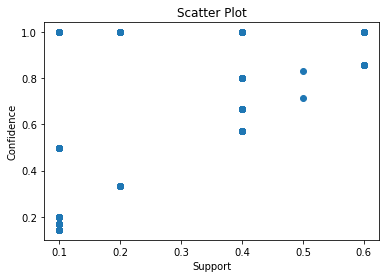

In [9]:
from matplotlib import pyplot as plt
support=rules.iloc[:,4]
confidence=rules.iloc[:,5]
plt.scatter(support,confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot')
plt.show()

In [10]:
frequent_itemsets=apriori(df,min_support=0.15,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Sixth Sense, Gladiator, V3_Sixth ..."
77,0.4,"(V1_Gladiator, V2_Patriot, Sixth Sense, Gladia..."
78,0.4,"(V1_Gladiator, V2_Patriot, Sixth Sense, V3_Six..."
79,0.4,"(V1_Gladiator, V2_Patriot, Gladiator, V3_Sixth..."


In [14]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(V1_Gladiator, V2_Patriot, Sixth Sense, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V3_Sixth Sense),"(V1_Gladiator, V2_Patriot, Sixth Sense, Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [12]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(Green Mile),"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
87,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
94,"(Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [13]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(V1_Gladiator, Sixth Sense, Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Gladiator),"(V1_Gladiator, V2_Patriot, Sixth Sense, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
652,(V3_Sixth Sense),"(V1_Gladiator, V2_Patriot, Sixth Sense, Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
